In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['cardio_train.csv']


In [17]:
df = pd.read_csv('../input/cardio_train.csv', sep=';', index_col=0)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [18]:
df['age'] = np.floor(df['age'] / 365.25)
# df['gender'] = df['gender'].map({1:0, 2:1})
# new_df = pd.get_dummies(df, columns=['cholesterol', 'gluc'])
# new_df.head()
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,51.0,1,165,64.0,130,70,3,1,0,0,0,1
3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,47.0,1,156,56.0,100,60,1,1,0,0,0,0


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(df.drop('cardio', axis=1),
                                                      df['cardio'],
                                                      test_size=0.3,
                                                      random_state=2019)

In [20]:
# Обучение случайного леса
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=2019)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_valid)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_valid, y_pred))

0.7089047619047619


In [ ]:
# Доводка параметров

Feature ranking:
1 weight 0.23119722217105107
2 height 0.20711768525239013
3 ap_hi 0.17727571651996651
4 age 0.166804333478455
5 ap_lo 0.10132059550657402
6 cholesterol 0.043423680776322554
7 gluc 0.019983733620097813
8 gender 0.019269823094231472
9 active 0.014980678342149847
10 smoke 0.010185351607115317
11 alco 0.008441179631646208


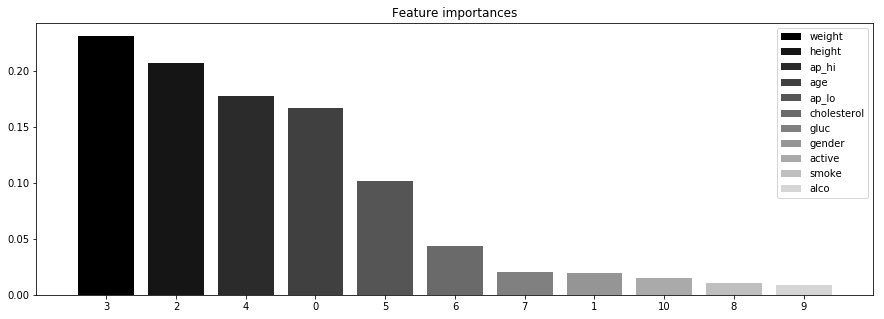

In [27]:
import matplotlib.pyplot as plt

features = dict(zip(range(len(df.columns)-1), df.columns[:-1]))

# Важность признаков
importances = rf.feature_importances_

indices = np.argsort(importances)[::-1]
# Plot the feature importancies of the forest
num_to_plot = max(10, len(df.columns[:-1]))
feature_indices = [ind for ind in indices[:num_to_plot]]

# Print the feature ranking
print("Feature ranking:")

for f in range(num_to_plot):
    print(f+1, features[feature_indices[f]], importances[indices[f]])

plt.figure(figsize=(15,5))
plt.title("Feature importances")
bars = plt.bar(range(num_to_plot), 
               importances[indices[:num_to_plot]],
               color=([str(i/float(num_to_plot+1)) for i in range(num_to_plot)]),
               align="center")
ticks = plt.xticks(range(num_to_plot), 
                   feature_indices)
plt.xlim([-1, num_to_plot])
plt.legend(bars, [u''.join(features[i]) for i in feature_indices]);